# <!-- TITLE --> Description du jeu de données 
Les données comprenne la liste enregistrée des titres de jeux vidéo vendus à plus de 100 000 exemplaires dans plusieurs régions.
Les champs sont les suivants :
- Name - Nom du jeu
- Platform - Plate-forme de sortie du jeu (Wii, Xbox, PS, PC)
- Year_of_Release - Année de sortie du jeu
- Genre - Genre du jeu
- Publisher - Éditeur du jeu
- Global_Sales - Ventes mondiales totales.

In [149]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

data = pd.read_csv('video_games_sales.csv')

In [150]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [151]:
data.shape

(16719, 6)

In [152]:
data.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,8
Publisher,82
Global_Sales,109


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16711 non-null  object 
 4   Publisher        16637 non-null  object 
 5   Global_Sales     16610 non-null  float64
dtypes: float64(2), object(4)
memory usage: 783.8+ KB


In [154]:
data.describe()

,Year_of_Release,Global_Sales
count,16450.000000,16610.000000
mean,2005.755303,0.535270
std,38.760603,1.552653
min,0.000000,0.000000
25%,2003.000000,0.060000
50%,2007.000000,0.170000
75%,2010.000000,0.470000
max,2020.000000,82.530000


In [155]:
data = data.dropna(subset=['Global_Sales'])

In [156]:
data.shape

(16610, 6)

In [157]:
# - Year_of_Release par la médiane
data['Year_of_Release'].fillna(data['Year_of_Release'].median(), inplace=True)

# - Genre et Publisher par la valeur la plus fréquente (mode)
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
data['Publisher'].fillna(data['Publisher'].mode()[0], inplace=True)

<ipython-input-157-0630e6917501>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year_of_Release'].fillna(data['Year_of_Release'].median(), inplace=True)
<ipython-input-157-0630e6917501>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [158]:
from sklearn.preprocessing import LabelEncoder

# Créer des encodeurs pour chaque colonne catégorielle
label_encoders = {
    'Name': LabelEncoder(),
    'Platform': LabelEncoder(),
    'Genre': LabelEncoder(),
    'Publisher': LabelEncoder()
}

# encodage var catégorielle
for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

# Aperçu des données pour vérifier l'encodage
print(data.head())

    Name  Platform  Year_of_Release  Genre  Publisher  Global_Sales
0  10997        26           2006.0     10        359         82.53
1   9328        11           1985.0      4        359         40.24
2   5581        26           2008.0      6        359         35.52
3  10999        26           2009.0     10        359         32.77
4   7347         5           1996.0      7        359         31.37


In [159]:
correlation = data.corr()
correlation

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales
Name,1.000000,0.014406,-0.005081,-0.004582,0.027306,0.011220
Platform,0.014406,1.000000,0.170351,0.025329,-0.011585,0.026658
Year_of_Release,-0.005081,0.170351,1.000000,-0.128840,0.032856,-0.076250
Genre,-0.004582,0.025329,-0.128840,1.000000,-0.051983,0.023694
Publisher,0.027306,-0.011585,0.032856,-0.051983,1.000000,0.016124
Global_Sales,0.011220,0.026658,-0.076250,0.023694,0.016124,1.000000


In [160]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['Name', 'Global_Sales'])
y = data['Global_Sales']


# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [162]:
# Convertir y en un tableau numpy
y = y.values

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


# Vérifier les tailles des ensembles
print("Ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Ensemble de test        :", X_test.shape, y_test.shape)


Ensemble d'entraînement : (13288, 4) (13288,)
Ensemble de test        : (3322, 4) (3322,)


In [164]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, input_dim, h1 = 64, h2 = 32, output_dim = 1):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, h1)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(h1, h2)
    self.relu = nn.ReLU()
    self.fc3 = nn.Linear(h2, output_dim)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [165]:
torch.manual_seed(41)
model = Model(input_dim = X_train.shape[1])

In [166]:
# Convertir X (les features) en des tenseurs
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [167]:
# Convertir y (la var cible) en des tenseurs
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [168]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [169]:
epochs = 100
losses = []

#Boucle d'entraînement
for i in range(epochs):

  # Entraînement
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([13288])) that is different to the input size (torch.Size([13288, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 and loss: 2.940922975540161
Epoch: 10 and loss: 2.6426310539245605
Epoch: 20 and loss: 2.549495220184326
Epoch: 30 and loss: 2.549077272415161
Epoch: 40 and loss: 2.541550874710083
Epoch: 50 and loss: 2.538971424102783
Epoch: 60 and loss: 2.538262367248535
Epoch: 70 and loss: 2.537203550338745
Epoch: 80 and loss: 2.5366129875183105
Epoch: 90 and loss: 2.5360066890716553


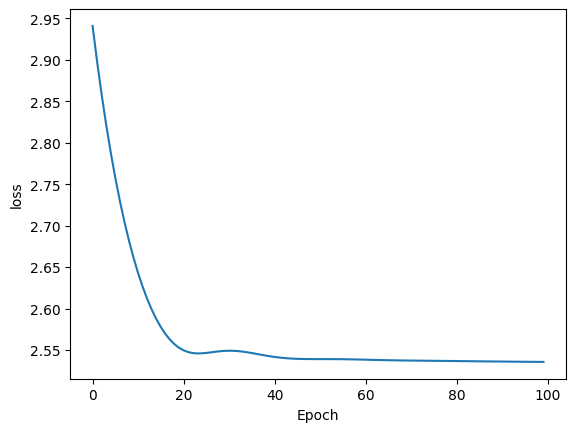

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [171]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(loss)

tensor(1.9302)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([3322])) that is different to the input size (torch.Size([3322, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
